# Bike Sharing Assignment

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import datetime as dt

#### Below is the csv file or shared data for assignment

In [2]:
df = pd.read_csv("E:\ML&AI\Bike Sharing case study\day.csv", low_memory=False)
df = pd.DataFrame(df)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Data Understanding

In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
print ("\nNULL values :  ", df.isnull().sum())

Rows     :  730
Columns  :  16

Missing values :   0

Unique values :  
 instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

NULL values :   instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Data Cleaning

In [7]:
#Finding the duplicates
duplicate = df[df.duplicated()]
print(duplicate)

#We don't have any duplicates in data

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [8]:
#Finding the null values
print(df.isnull().sum())

#we don't have any null

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
#we are removing the columns 'instant’ , ‘dteday’ , ‘casual’ and ‘registered' as they don't add any value to build a model.

df.drop(["instant","dteday","casual","registered"], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Data Analysis

In [13]:
#Check for the correlation of the variables

df.corr()["cnt"].abs().sort_values(ascending=False)

cnt           1.000000
atemp         0.630685
temp          0.627044
yr            0.569728
season        0.404584
weathersit    0.295929
mnth          0.278191
windspeed     0.235132
hum           0.098543
holiday       0.068764
weekday       0.067534
workingday    0.062542
Name: cnt, dtype: float64

In [14]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


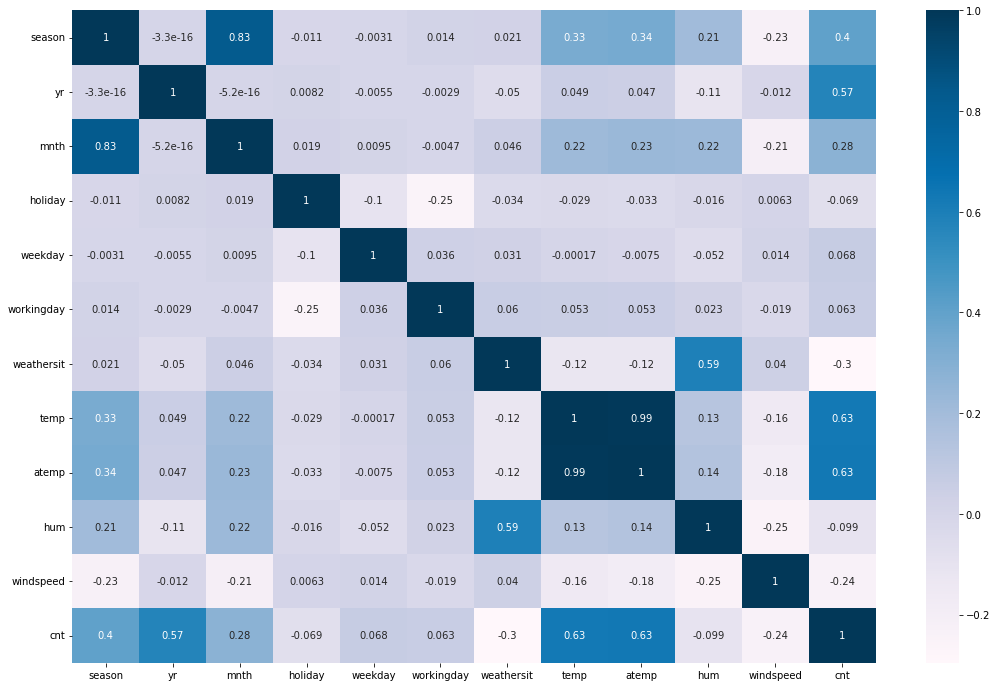

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.show()

<AxesSubplot:xlabel='temp', ylabel='cnt'>

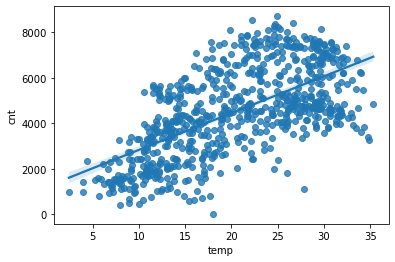

In [37]:
#We can see the most prefered tempereture when people most likely to use the bike

sns.regplot(data=df, x="temp", y="cnt")

In [33]:
# Let's convert the categorial columns into normal columns
one_hot_encoded_data = pd.get_dummies(df, columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit'])

df = one_hot_encoded_data

print(df)

          temp     atemp      hum  windspeed   cnt  season_1  season_2  \
0    14.110847  18.18125  80.5833  10.749882   985         1         0   
1    14.902598  17.68695  69.6087  16.652113   801         1         0   
2     8.050924   9.47025  43.7273  16.636703  1349         1         0   
3     8.200000  10.60610  59.0435  10.739832  1562         1         0   
4     9.305237  11.46350  43.6957  12.522300  1600         1         0   
..         ...       ...      ...        ...   ...       ...       ...   
725  10.420847  11.33210  65.2917  23.458911  2114         1         0   
726  10.386653  12.75230  59.0000  10.416557  3095         1         0   
727  10.386653  12.12000  75.2917   8.333661  1341         1         0   
728  10.489153  11.58500  48.3333  23.500518  1796         1         0   
729   8.849153  11.17435  57.7500  10.374682  2729         1         0   

     season_3  season_4  yr_0  ...  weekday_2  weekday_3  weekday_4  \
0           0         0     1  ...      

In [54]:
from sklearn.model_selection import train_test_split

In [61]:
X = df['cnt'].values.reshape(-1,1)
y = df['cnt'].values

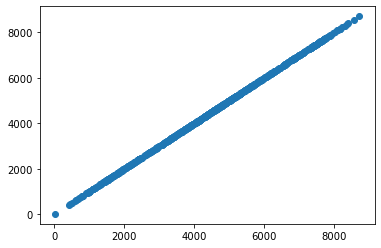

In [62]:
plt.scatter(X,y)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression(n_jobs=-1)

In [71]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [72]:
#train data prediction
y_train_pred = lr.predict(X_train)

In [73]:
#test data prediction
y_test_pred = lr.predict(X_test)

In [75]:
# Mean squeare error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred)

0.0

In [76]:
mean_squared_error(y_test, y_test_pred)

0.0

In [77]:
# coefficient of determination (r2)
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

1.0

In [78]:
r2_score(y_test, y_test_pred)

1.0

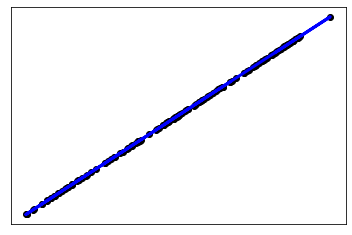

In [81]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()